In [26]:
import sys 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import nltk 
from wordcloud import WordCloud
    

ModuleNotFoundError: No module named 'wordcloud'

In [12]:
data = pd.read_csv('C:/Users/PRIYANKA/Fake news detection/code/fake_or_real_news.csv')
data = data.drop(data.columns[[0, 1]], axis=1)

In [13]:
print(data)

                                                   text label
0     Daniel Greenfield, a Shillman Journalism Fello...  FAKE
1     Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE
2     U.S. Secretary of State John F. Kerry said Mon...  REAL
3     — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE
4     It's primary day in New York and front-runners...  REAL
...                                                 ...   ...
6330  The State Department told the Republican Natio...  REAL
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL

[6335 rows x 2 columns]


In [14]:
print(data.shape)

(6335, 2)


In [20]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priyanka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [21]:
data.loc[data['label'] == 'FAKE', 'label',] = 0
data.loc[data['label'] == 'REAL', 'label',] = 1


In [22]:
X = data['text']
Y = data['label']


In [23]:
print(X) 

0       Daniel Greenfield, Shillman Journalism Fellow ...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary State John F. Kerry said Monday...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day New York front-runners Hillar...
                              ...                        
6330    The State Department told Republican National ...
6331    The ‘P’ PBS Should Stand ‘Plutocratic’ ‘Pentag...
6332    Anti-Trump Protesters Are Tools Oligarchy Ref...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object


In [24]:
print(Y)


0       0
1       0
2       1
3       0
4       1
       ..
6330    1
6331    0
6332    0
6333    1
6334    1
Name: label, Length: 6335, dtype: object


In [27]:
fake_data = data[data["label"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined

In [28]:
real_data = data[data["label"] == 1]
all_words = ' '.join([text for text in real_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

NameError: name 'WordCloud' is not defined

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [30]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [31]:
print(X_train_features)


  (0, 12497)	0.022369862342906093
  (0, 11719)	0.014661513379175812
  (0, 35529)	0.021941550696159436
  (0, 34470)	0.023892632766417288
  (0, 17464)	0.02626652841781487
  (0, 49177)	0.04122975515788402
  (0, 27447)	0.018861656962008873
  (0, 34732)	0.038732067813905646
  (0, 9859)	0.01710259215241636
  (0, 32486)	0.01547250641855069
  (0, 42273)	0.018599948443274568
  (0, 45325)	0.013941460108745949
  (0, 54002)	0.031953766726989276
  (0, 43626)	0.030670933853333658
  (0, 52578)	0.030137002748817834
  (0, 45154)	0.02611607006406482
  (0, 3363)	0.02041034587017949
  (0, 39222)	0.030137002748817834
  (0, 13895)	0.017404883128646347
  (0, 54139)	0.015266861699586244
  (0, 15270)	0.03643398004818942
  (0, 20094)	0.022801569988675326
  (0, 11616)	0.022439218267217738
  (0, 14172)	0.021102947586452033
  (0, 55688)	0.020119350907887416
  :	:
  (5067, 50671)	0.029184961285029547
  (5067, 41386)	0.02916848124978431
  (5067, 667)	0.05863578501343069
  (5067, 33110)	0.018057234550285118
  (5067, 

In [32]:
model = LogisticRegression()
model.fit(X_train_features, Y_train)

LogisticRegression()

In [33]:
prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9585635359116023


In [34]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9273875295974744


[[609  29]
 [ 63 566]]


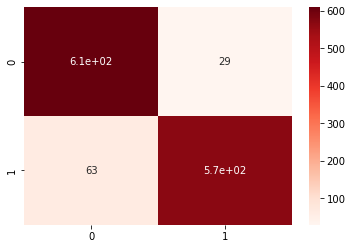

In [35]:
y_pred = model.predict(X_test_features)
cm = confusion_matrix(Y_test, y_pred)
sns.heatmap(cm,annot = True,cmap = 'Reds') # plot CM for train data
print(cm)

[609, 29, 63, 566]
([<matplotlib.patches.Wedge object at 0x0000017B9C5EB100>, <matplotlib.patches.Wedge object at 0x0000017B9C5EB610>, <matplotlib.patches.Wedge object at 0x0000017B9C5EBAF0>, <matplotlib.patches.Wedge object at 0x0000017B9C5EBFD0>], [Text(0.1335657567463162, 2.1959417543789232, 'True Negative'), Text(-2.1972953471959844, 0.10905575267210021, 'False Positive'), Text(-2.165033674945343, -0.3906778549555435, 'False Negative'), Text(0.3664965316447805, -2.169258005008244, 'True Positive')])


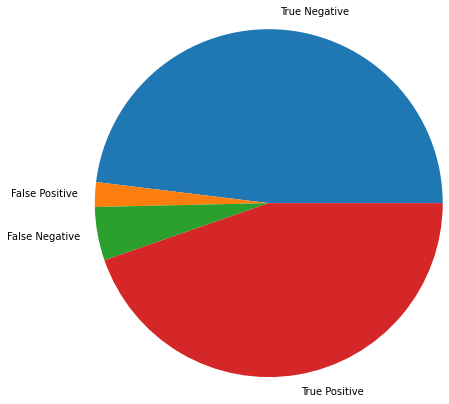

In [36]:
list = cm.tolist()
pielist = []
for i in list:
    for j in i:
        pielist.append(j)
print(pielist)
df = pd.DataFrame(pielist)
print(plt.pie(df[0], labels=['True Negative', 'False Positive', 'False Negative', 'True Positive'], radius=2))

In [37]:
input_mail = ["Passengers in trouble as C Rly cancels Nagpur-Pune Garib Rath"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Real news')

else:
  print('Fake news')

[0]
Fake news
